In [15]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

df = pd.read_csv('C:/Users/lenovo/Desktop/cluster2.txt', sep="   ", header=None)
df.head()



d:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0,1,2,3,4,5,6
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
No Clusters         9 non-null int64
DB-Index            9 non-null float64
Silhouette Score    9 non-null float64
dtypes: float64(2), int64(1)
memory usage: 296.0 bytes


In [16]:
df.describe()

,0,1,2,3,4,5,6
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.083612,121.127090,69.137124,20.377926,81.571906,32.212375,0.483010
std,3.408886,32.140483,18.914092,15.939935,128.399664,8.286510,0.339944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,100.000000,63.000000,0.000000,0.000000,27.600000,0.254000
50%,4.000000,115.000000,70.000000,23.000000,0.000000,32.100000,0.383000
75%,7.000000,142.500000,80.000000,32.000000,128.500000,36.650000,0.649500
max,17.000000,197.000000,122.000000,60.000000,846.000000,67.100000,2.329000


In [17]:
from sklearn.preprocessing import scale

In [19]:
X = pd.DataFrame(scale(df))

In [20]:
print(X.head(n=10))

          0         1         2         3         4         5         6
0  0.563117  0.837510  0.151616  0.918861 -0.636362  0.167737  0.424279
1 -0.906097 -1.125921 -0.166140  0.541817 -0.636362 -0.678426 -0.388979
2  1.150802  1.928304 -0.272058 -1.280563 -0.636362 -1.077331  0.556876
3 -0.906097 -1.001259 -0.166140  0.164773  0.096955 -0.497105 -0.931152
4 -1.199940  0.494688 -1.543081  0.918861  0.674246  1.316100  5.318565
5  0.269274 -0.159789  0.257534 -1.280563 -0.636362 -0.799306 -0.830968
6 -0.318412 -1.344080 -1.013488  0.730339  0.050147 -0.146552 -0.692478
7  1.738488 -0.190954 -3.661451 -1.280563 -0.636362  0.373233 -1.028389
8 -0.612254  2.364622  0.045697  1.547268  3.599711 -0.206992 -0.957671
9  1.150802  0.120701  1.422638 -1.280563 -0.636362 -3.893844 -0.739624


In [21]:
from sklearn.cluster import KMeans

In [22]:
clustering = KMeans(n_clusters=2, random_state=1234567)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234567, tol=0.0001, verbose=0)

In [23]:
print(clustering.cluster_centers_)

[[ 0.29748288  0.63156745  0.27236296  0.66397931  0.66170181  0.5173227
   0.35452766]
 [-0.21370897 -0.45371225 -0.19566304 -0.47699663 -0.47536049 -0.37163987
  -0.25468941]]


In [24]:
print(clustering.labels_)

[0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1
 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0]


In [25]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [26]:
dbvals = []
sscores = []
for cls in range(9):
    clustering = KMeans(n_clusters=cls+2,random_state=1234567)
    clustering.fit(X)
    dbval = davies_bouldin_score(X, clustering.labels_)
    sscore = silhouette_score(X, clustering.labels_)
    dbvals.append(dbval)
    sscores.append(sscore)

In [27]:
df = pd.DataFrame({'No Clusters': range(2,11), 'DB-Index': dbvals, 'Silhouette Score': sscores})
print(df)

   No Clusters  DB-Index  Silhouette Score
0            2  1.909949          0.193903
1            3  1.879206          0.157437
2            4  1.756110          0.156600
3            5  1.619288          0.184288
4            6  1.509890          0.177244
5            7  1.429024          0.173296
6            8  1.500841          0.161693
7            9  1.433925          0.168449
8           10  1.535575          0.149768


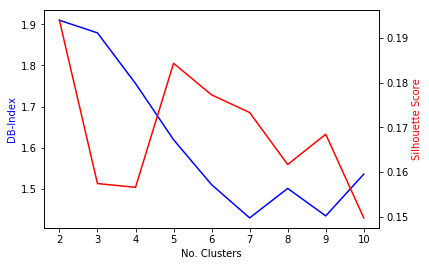

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df['No Clusters'], df['DB-Index'], 'b-')
ax1.set_ylabel('DB-Index', color = 'b')
ax1.set_xlabel('No. Clusters', color = 'black')

ax2 = ax1.twinx()
ax2.plot(df['No Clusters'], df['Silhouette Score'], 'r-')
ax2.set_ylabel('Silhouette Score', color='r')
plt.show()